Análisis de procesos estocásticos

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.io import wavfile
from scipy.io.wavfile import write
import IPython.display as ipd
from IPython.lib.display import Audio
import scipy.io.wavfile as waves


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read(filename):
    rate, data = wavfile.read(filename)
    length = data.shape[0] / rate
    time = np.linspace(0, length, data.shape[0], endpoint=False)
    return time, data

In [ ]:
filename = '/content/drive/My Drive/Repositorio de L5/Grabaciones - pro. estocásticos/llamador-artificial.wav'
ipd.Audio(filename)

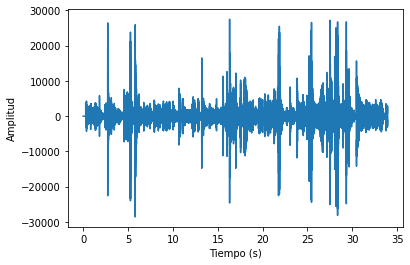

In [ ]:
time, data = read(filename)

data_canal=data[:,0]
#Faltaría lo de seleccionar intervalo para graficar
plt.plot(time,data_canal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
#plt.xlim(25,30)
plt.show()


Barrido con la ventana de promedios para "filtrar" picos.

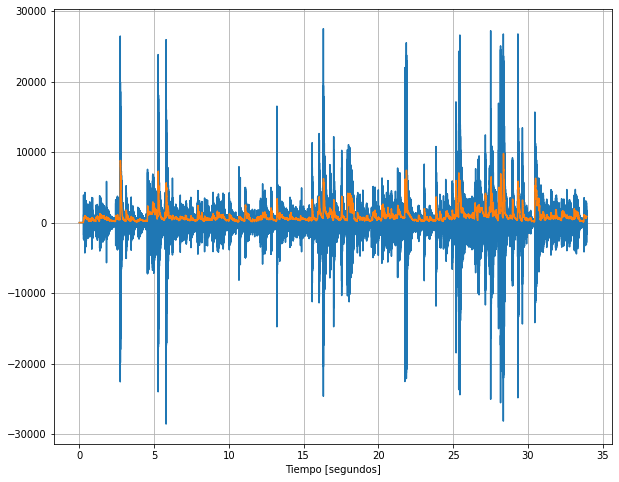

<Figure size 432x288 with 0 Axes>

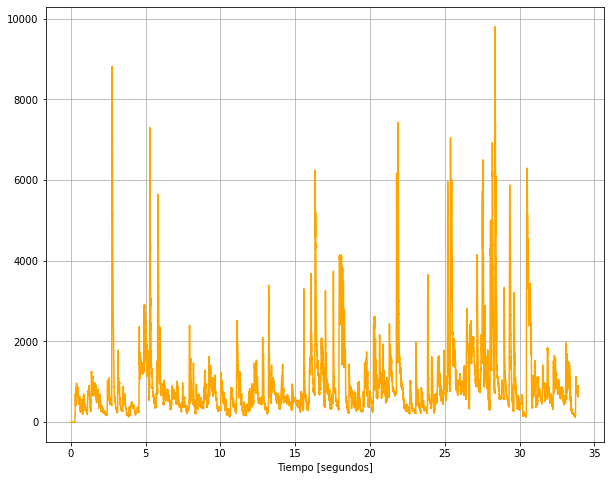

In [ ]:
from scipy.ndimage.filters import uniform_filter1d

def smooth_abs(data):
    return uniform_filter1d(np.abs(1.*data), size=1000)

plt.figure(figsize=(10, 8))
sel = np.abs(time- 1.8) < len(time)
plt.plot(time[sel], data_canal[sel])
data2=smooth_abs(data_canal)
plt.plot(time[sel], data2[sel])
plt.xlabel("Tiempo [segundos]");
plt.grid()


plt.figure()
plt.figure(figsize=(10, 8))
data2=smooth_abs(data_canal)
plt.plot(time[sel], data2[sel],color="orange")
plt.xlabel("Tiempo [segundos]");
plt.grid()
plt.show()


Cantidad de eventos:88


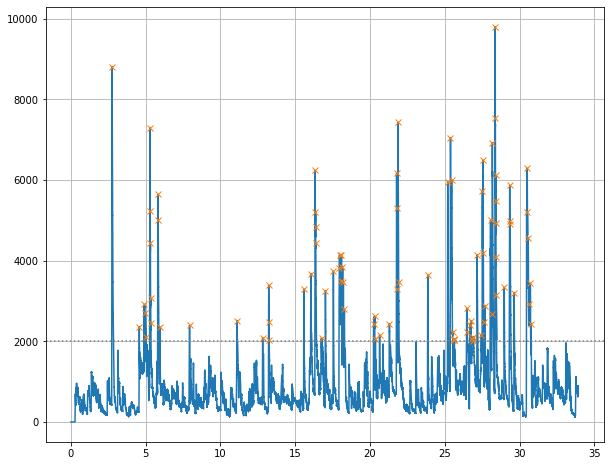

In [ ]:
from scipy.signal import find_peaks
height = 2000
peaks, info = find_peaks(np.abs(np.abs(data2)), height=height, width=100)

plt.figure(figsize=(10, 8))
plt.plot(time, np.abs(data2))
plt.plot(time[peaks], np.abs(data2[peaks]), "x")
plt.axhline(height, linestyle=":", color='gray');
plt.grid()
print("Cantidad de eventos:{}".format(len(peaks)))

**Procesamiento de datos**


Histograma de numero de picos en unidades de tiempo definidas

range(1, 40, 10)


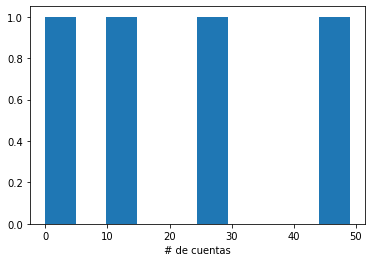

In [ ]:
def count_range_in_list(li, min, max):
	ctr = 0
	for x in li:
		if min <= x <= max:
			ctr += 1
	return ctr

list1 = time[peaks]
#print(list1)


delta = 10 #s
y=[0]
c=[]
x=[]
d=[]

for x in range(1, int(time[peaks[-1]])+delta, delta):

    c.append(count_range_in_list(list1,y, x))
    y=x
    d.append(x)


plt.hist(c);
plt.xlabel("# de cuentas");



Histograma de tiempo entre eventos (picos)

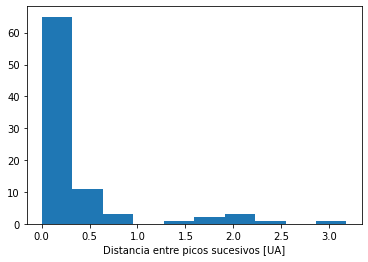

In [ ]:

delta = time[peaks[1:]] - time[peaks[:-1]]
plt.hist(delta);
plt.xlabel("Distancia entre picos sucesivos [UA]");


Histograma de la altura de los picos

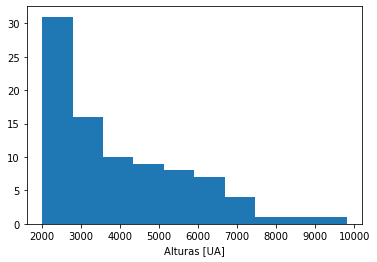

In [ ]:
#plt.figure(figsize=(10, 8))
plt.hist(info['peak_heights']);
plt.xlabel("Alturas [UA]");



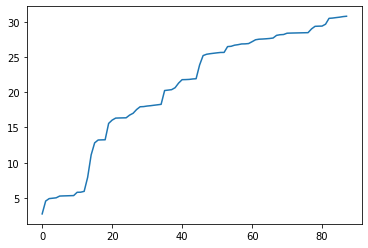

In [ ]:
plt.plot(time[peaks])